# ENPH 213 - Week 7 Lab

In this lab, we will be working on Discrete Fourier Transforms and continuing to develop your Python skills.

When you are finished, please rename this notebook to LastName_ENPH213_Lab7, where LastName is your last name.  Submit that file to onQ.

For marking Parts 1-4 will be marked together (Weighted out of 10).

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Part 1

Create two windowing functions.

The first is a Trapezoidal Window function $trapWindow(x)$ that rises in the first 10% and falls in the final 10% of the points.  It should be at its maximum value for all points in between.

The second function is $sineWindow(x)$ that uses the first lobe of a sine wave (from 0 to $\pi$).

Both of these window functions should accomodate an input data set with an arbitrary, even number of points.  

Plot the functions for 50 points within the range of $-1 \leq x \leq 1$.


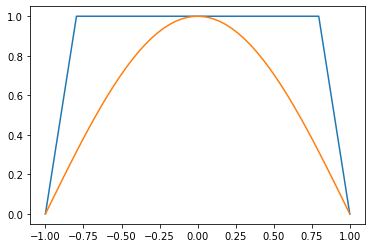

In [157]:
xr = np.linspace(-1,1,50) #defining x range
def trapWindow(x): 
    max = abs(np.max(x)) #find the maximum value in the array to get the top of trapezoid
    trap = np.zeros(len(x)) #make the array for the trapezoid
    for i in range(len(x)):
        if (i <= int(len(x)*0.1)): #when i is less than 10 percent construct both ends of the trapezoid
            trap[i] = max*(i/(len(x)*0.1))
            trap[len(x)-1-i] = max*(i/(len(x)*0.1))
        
        elif(i > int(len(x)*0.1)): #when i is between 10 and 90 percent than the max value is the top
            if(i < int(len(x)*0.9)):
                trap[i] = max
    return trap

def sineWindow(x):
    max = np.max(x) #same as trapwindow
    sine = np.zeros(len(x))
    
    for i in range(len(x)):
        sine[i] = max*np.sin(i*np.pi/(len(x)-1)) #creating the values for sine
    return sine

plt.plot(xr,trapWindow(xr))
plt.plot(xr,sineWindow(xr))

# Part 2

Create a data set of the linear funcion $f(t) = 2t$ with 30 regularly spaced points between  $-\pi \leq t \leq \pi$.  Manually set the first and last points to zero as a basic windowing protocol.  This creates a sawtooth function.

Create a function $myDFT(t, y)$ that calculates and prints the $a_k$ and $b_k$ coefficients using the forms for discrete Fourier Transforms.  Once found, create a second function $plotFourier(t, ak, bk, omega)$ that returns the evaluated Fourier expansion and plots the Fourier series expansion using the Fourier coefficients as input.  Plot the function using 201 points in graph.

Remember that when you remove the last point, your data set will have an odd number of points. 

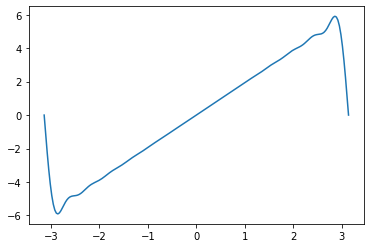

In [194]:
t = np.linspace(-np.pi,np.pi,30)
f = np.zeros(30) #creating the function
for i in range(len(t)):
    f[i] = 2*t[i]
w = (2*np.pi)/(t[-1]-t[0]) #defining omega as 2 pi times the difference between the two end values on the array



def myDFT(t,y):
    kmax = int(len(t)/2)
    
    ak = np.zeros(kmax) # creating the arrays for the coefficients
    bk = np.zeros(kmax)
    
    for k in range(kmax): # in the range of kmax which is the length of the t array divided by 2
        ak[k] = np.sum(y * np.cos(k*w*t))/kmax
        bk[k] = np.sum(y * np.sin(k*w*t))/kmax  #take the sum of all this values through the for loop
    return ak,bk
ak, bk = myDFT(t,f)



def plotFourier(t,ak,bk,w):
    p = np.zeros(len(t)) #making the array for p
    a_0 = ak[0]/2 #define the first coefficient to make things easier
    p += a_0
    kmax = int(len(t)/2) #same kmax as before
    for k in range(1,len(ak)):
        p += ak[k]*np.cos(k*w*t) + bk[k]*np.sin(k*w*t) #more sums
    plt.plot(t,p)
    #plt.plot(t,f,'o')
    #plt.legend(["Discrete Fourier Transform", "Raw Data"]) #can uncomment these to see the actual points plotted against it
    return 


t2 = np.linspace(-np.pi,np.pi,201) #creating another t array
w = 2*np.pi/(t2[-1]-t2[0])

plotFourier(t2,ak,bk,w)

# Part 3

Use the two windowing functions from Part 1 (separately) on the sawtooth function from Part 2.  Determine and print the coefficients and plot the figures.

**Question: Which windowing function seems to work best?**

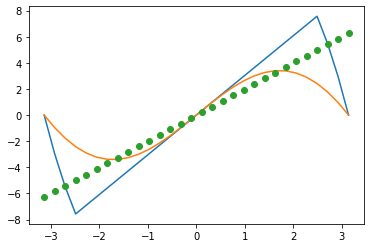

In [190]:
Trapa, Trapb = myDFT(t,trapWindow(t)*t)
Sina, Sinb = myDFT(t,sineWindow(t)*t) # making the variables to use to plot

TrapPlot = plotFourier(t,Trapa,Trapb,w)
SinePlot = plotFourier(t,Sina,Sinb,w)
plt.plot(t,f,'o')

From looking at the above plots, it seems the trapWindow function seems to fit better for this very linear data set

# Part 4

Create a function $cDFT(t, y)$ that calculates and prints the $c_k$ coefficients using the complex form for discrete Fourier transforms. Be sure to comment on the format of the output array.  Once found, plot the absolute value of the coefficients against the "frequencies" $k \omega$ of the Fourier transform.  Note, there are no negative frequencies, but it is sometimes useful to plot them for visual analysis.

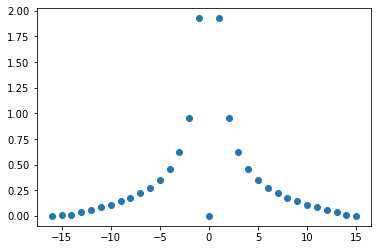

In [199]:
def cDFT(t,y):
    kmax = int(len(t)/2) #Still same kmax as before
    ck = np.array(np.zeros(2*(kmax+1)), dtype = complex) # defining the array for ck to be able to handle complex numbers
    for k in range(-kmax,kmax): #defining the loop from negative to positive kmax
        ck[k] = np.sum((y * np.exp(-1j*k*w*t)))/len(t) #more sums from the equations in class
    return ck

ck = cDFT(t,f)
w = 2*np.pi/(t[-1]-t[0]) #omega still calculated the same way


def p2(t,ck,w): # this function exists to plot everything
    kmax = int(len(t)/2)
    kw = np.ones(2*(kmax+1)) # had to add one to deal with indexing and plotting issues
    for k in range(-kmax-1,kmax+1): #other ways to do this too, but this is scaling each value to omega
        kw[k] = k*w
    plt.plot(kw,np.abs(ck),'o') #plotting the absolute value of ck versus the values for kw
    return 

p2(t,ck,w)

## Acknowledgements

Please comment on any help that you received from your group members or others concerning this Lab assignment.

Did the majority of this lab with Julia Everitt